In [11]:
# Author:     Piotr Artman
# SudentID:   C00220223
# Subject:    Data Science and Machine Learning 2
# Content:    Demonstrartion of use of Naive Bayesian classification

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [13]:
# Generating sample data
X, y = make_blobs(n_samples=2000, n_features=2, centers=2, random_state=2, cluster_std=1.5)

# Splitting data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 

# Split the temporary test set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

models = {
    'Model 1: GaussianNB with default parameters': GaussianNB(),                                                    # Model 1: GaussianNB with default parameters
    'Model 2: GaussianNB with adjusted variance smoothing': GaussianNB(var_smoothing=1e-5),                         # Model 2: GaussianNB with adjusted variance smoothing
    'Model 3: GaussianNB with adjusted class priors (assumeed slight imbalance)': GaussianNB(priors=[0.2, 0.8]),    # Model 3: GaussianNB with adjusted class priors (assumeed slight imbalance)
    'Model 4: GaussianNB with adjusted class priors (assumeed high imbalance)': GaussianNB(priors=[0.0001, 0.9999]),# Model 4: GaussianNB with adjusted class priors (assumeed high imbalance)
}

In [14]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, matrix, report

--- Model 1: GaussianNB with default parameters ---



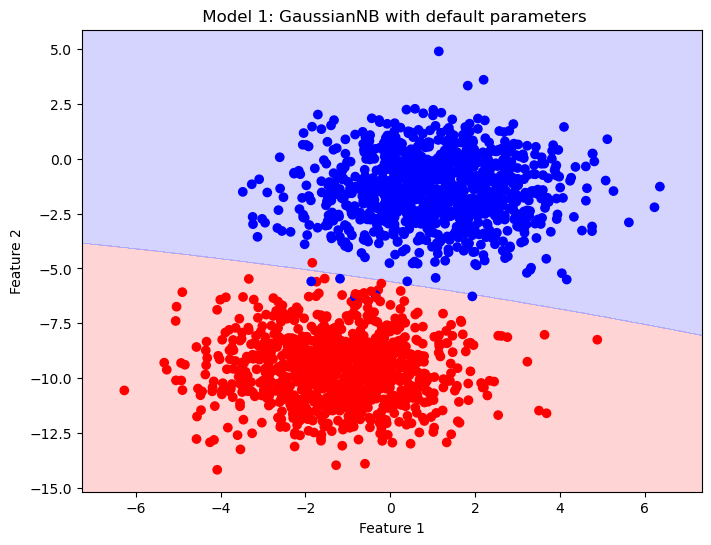

Confusion Matrix:



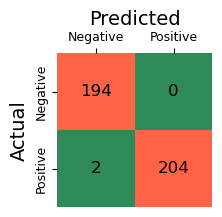

Accuracy: 0.995

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       194
           1       1.00      0.99      1.00       206

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400


--- Model 2: GaussianNB with adjusted variance smoothing ---



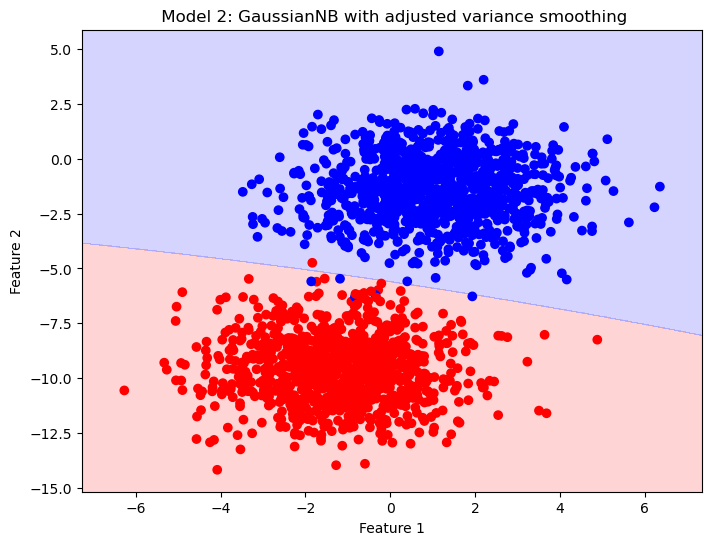

Confusion Matrix:



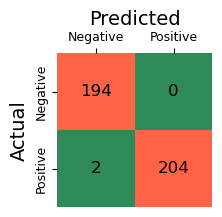

Accuracy: 0.995

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       194
           1       1.00      0.99      1.00       206

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400


--- Model 3: GaussianNB with adjusted class priors (assumeed slight imbalance) ---



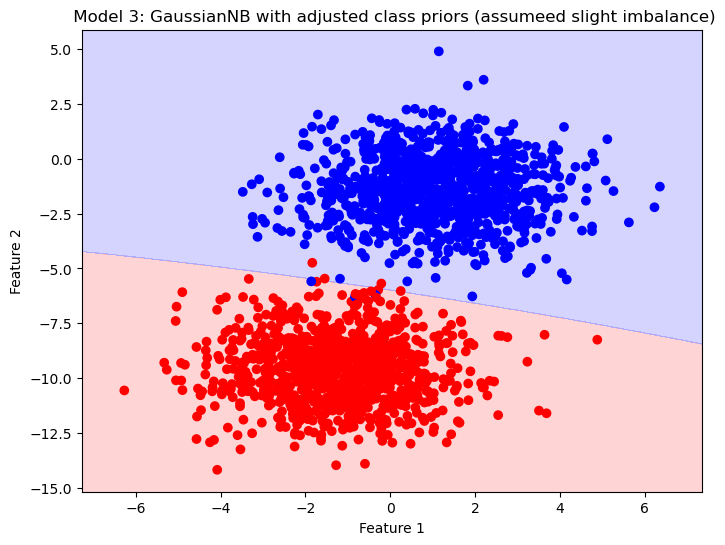

Confusion Matrix:



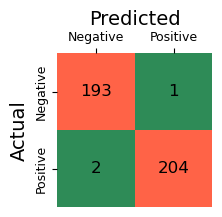

Accuracy: 0.9925

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       194
           1       1.00      0.99      0.99       206

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


--- Model 4: GaussianNB with adjusted class priors (assumeed high imbalance) ---



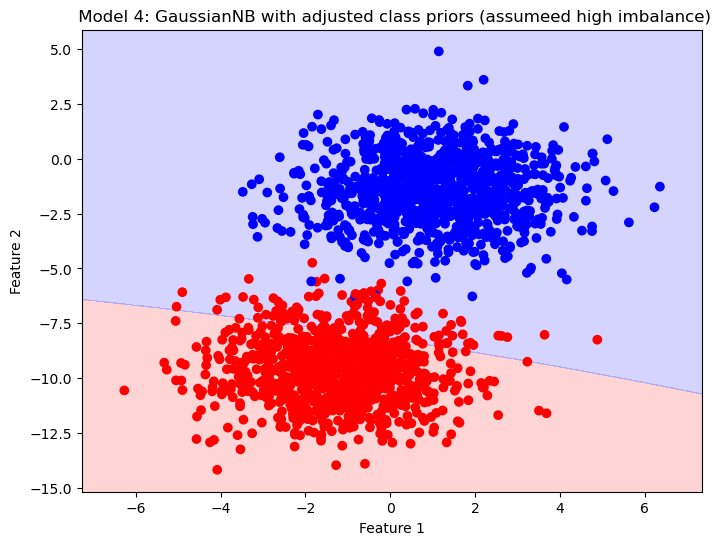

Confusion Matrix:



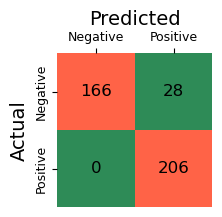

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       194
           1       0.88      1.00      0.94       206

    accuracy                           0.93       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.93      0.93       400




In [15]:
def display_confusion_matrix(matrix, figsize=(2, 2)): 
  plt.figure(figsize=figsize) 
  colors = [
      '#2E8B57',     # SeaGreen
      '#D3D3D3',     # Lighter grey
      '#FF6347'      # Tomato
  ]
  colours_for_cmap = ListedColormap(colors)
  ax = sns.heatmap(matrix, annot=True, fmt="d", cmap=colours_for_cmap, cbar=False, annot_kws={"color": "black", "fontsize": 12}) 
  plt.tick_params(labelsize=9) 
  ax.set_xlabel('Predicted', fontsize=14)  
  ax.set_ylabel('Actual', fontsize=14)
  ax.xaxis.set_label_position('top')
  ax.xaxis.tick_top()
  ax.set_xticklabels(['Negative', 'Positive'])
  ax.set_yticklabels(['Negative', 'Positive'])

# Printing  comparison of results

for model_name, model in models.items():
    accuracy, matrix, report = train_and_evaluate(model, X_train, X_test, y_train, y_test)

    print(f"--- {model_name} ---\n")

    # Plot decision boundaries
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f" {model_name}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Display confusion matrix
    print(f"Confusion Matrix:\n") 
    display_confusion_matrix(matrix) 
    plt.show()

    # Printing numeric benchmarks    
    print(f"Accuracy: {accuracy}\n")
    print(f"Classification Report:\n{report}\n")
